In [ ]:
from diffeq_2 import euler, heun, rku4, verlet, pefrl
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj
from scipy.signal import find_peaks
from scipy.misc import derivative

In [3]:
def analytic(t, theta_0=1, theta_dot0=0):
    m = np.sin(theta_0 / 2)**2
    K = ellipk(m)
    omega_0 = 1
    return 2 * np.arcsin(np.sin(theta_0 / 2) * ellipj(K - omega_0*t, np.sin(theta_0 / 2)**2)[0])

def T_0(theta_0=1):
    m = np.sin(theta_0 / 2)**2
    K = ellipk(m)
    return 4 * K

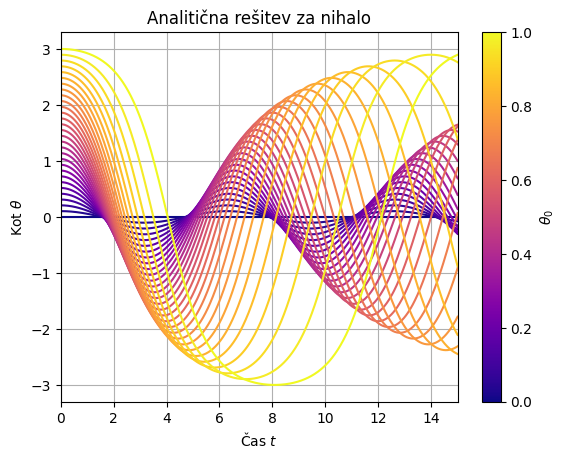

In [24]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

t = np.linspace(0, 15, 1000)

theta = analytic(t)
theta_0s = np.linspace(0, 3, 30)
cmap = plt.colormaps.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(theta_0s)))
fig, ax = plt.subplots()

for i, theta in enumerate(theta_0s):
    ax.plot(t, analytic(t, theta), c=colors[i], label=f'$\\theta_0 = {theta:.2f}$')

sm = ScalarMappable(cmap=cmap)
norm = Normalize(vmin=theta_0s.min(), vmax=theta_0s.max())
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$\theta_0$')
plt.grid()
plt.xlim(0, 15)
plt.xlabel('Čas $t$')
plt.ylabel('Kot $\\theta$')
plt.title('Analitična rešitev za nihalo')
# plt.legend(loc=5)
# plt.colorbar(sm)
plt.savefig('graphs/analytic.pdf', dpi=512)


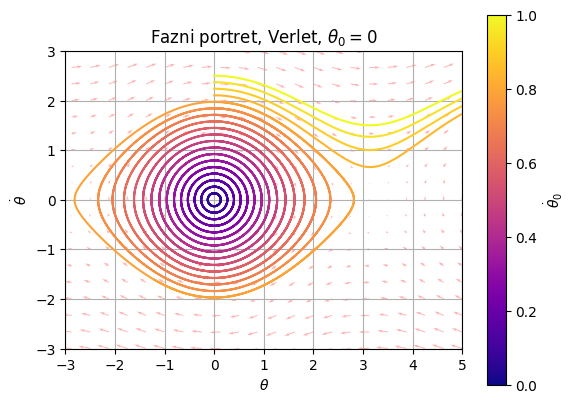

In [ ]:
# def prevajanje(y, t, k=np.float64(0.1), T_zun=np.float64(-5)):
#     return - k * (y - T_zun)

def nihanje(theta):
    return -np.sin(theta)

# def nihanje_vec(y, t):
#     return np.array([y[1], -np.sin(y[0])])

fig, ax = plt.subplots()


theta_range = np.linspace(-4, 5, 25)
p_range = np.linspace(-4, 4, 25)

theta_pika = p_range
p_pika = -np.sin(theta_range)

U, V = np.meshgrid(theta_range, p_range)

U_copy = U.copy()
U = V
V = -np.sin(U_copy)

ax.quiver(theta_range, p_range, U, V, alpha=0.3, color='r')

t = np.arange(0, 20, 0.01)

theta_dot0s = np.linspace(0, 2.5, 20)
cmap = plt.colormaps.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(theta_dot0s)))

for i, theta_dot in enumerate(theta_dot0s):
    (x, v) = verlet(nihanje, 0., theta_dot, t)
    ax.plot(x, v, c=colors[i], label=f'$\\dot \\theta_0 = {theta_dot:.2f}$')

sm = ScalarMappable(cmap=cmap)
norm = Normalize(vmin=theta_0s.min(), vmax=theta_0s.max())
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$\dot \theta_0$')

plt.grid()
plt.gca().set_aspect("equal")
plt.xlim(-3,5)
plt.ylim(-3,3)
plt.ylabel('$\\dot \\theta$')
plt.xlabel('$\\theta$')
plt.title('Fazni portret, Verlet, $\\theta_0 = 0$')
# plt.legend(loc=5)
plt.savefig('graphs/analytic_phase.pdf', dpi=512)
